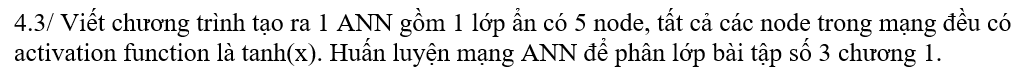

In [1]:
import numpy as np
import matplotlib.pyplot as plt

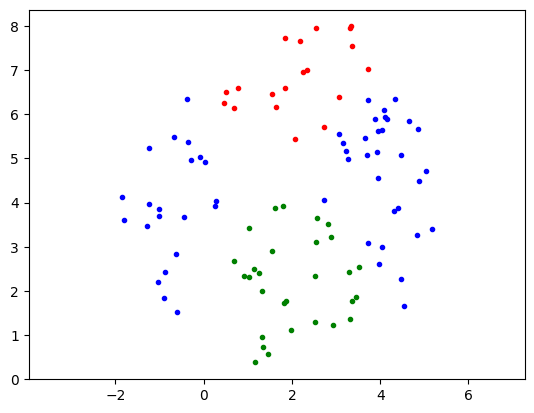

In [2]:
#TẠO RA 100 ĐIỂM DỮ LIỆU TRONG KHÔNG GIAN 2D, CÓ PHÂN BỔ ĐỀU DÀNH CHO 3 LOẠI NHÃN

plt.figure()
plt.axis('equal')

points =[]
labels = []

i = 0
while i < 100 :
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if (x-2)**2 + 0.5*(y-8)**2 < 4: 
        labels.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x-2)**2 + 3/2*(y-2)**2 <6:
        labels.append(1)
        i+=1
        plt.plot(x,y, 'g.')

    #Loại 3
    elif 3*(x+1)**2 + 13/20*(y-4)**2 <5 or 3*(x-4)**2 + 13/20*(y-4)**2 < 5:
        labels.append(2)
        i+=1
        plt.plot(x,y, 'b.')

    else: continue
    points.append([x,y])



In [3]:


class myann4_3:
    def __init__(self, inum, hidnum, onum):
        self.w1 = np.random.random((hidnum, inum + 1)) - .5
        self.w2 = np.random.random((onum, hidnum + 1)) - .5

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))  # chống tràn số
        return e_x / e_x.sum()

    def feedforward(self, X):
        self.x1 = np.hstack((X, np.array([1])))
        a1 = self.w1 @ self.x1
        z1 = np.tanh(a1)

        z1 = np.hstack((z1, np.array([1])))
        self.z1 = z1
        a2 = self.w2 @ z1
        self.a2 = a2
        z2 = self.softmax(a2)
        return z2
    
    def train(self, X, t, epoch):
        lr = 0.2
        for _ in range(epoch):
            for i in range(X.shape[0]):
                input = X[i]
                y = self.feedforward(input)

                target = np.zeros_like(y)
                target[t[i]] = 1

                # gradient output layer (cross-entropy derivative)
                D2 = y - target
                GD2 = D2[:, None] @ self.z1[None, :]  # outer product
                self.w2 -= lr * GD2

                # Hidden layer gradient
                D1 = (self.w2[:, :-1].T @ D2) * (1 - self.z1[:-1]**2)
                GD1 = D1[:, None] @ self.x1[None, :]
                self.w1 -= lr * GD1


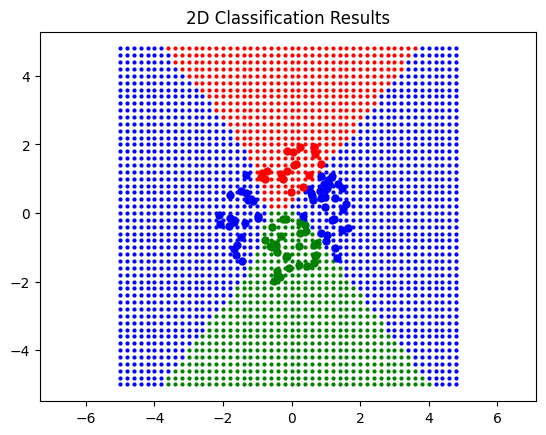

In [4]:
X = np.array(points).squeeze()  # Input data
# Chuẩn hóa dữ liệu (giúp học nhanh hơn nhiều!)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std  # chuẩn hóa

t = np.array(labels)  # Output labels

ann = myann4_3(inum=2, hidnum=20, onum=3)
ann.train(X, t, epoch=5000)

# Visualize the classification results
plt.figure()
color = 'rgb'

# Plot the classification regions
for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([x1, x2])
        out = ann.feedforward(x)
        label = np.argmax(out)  # lấy index có giá trị cao nhất
        plt.plot(x1, x2, color[label] + '.', markersize=4)  # Plot predicted points

# Plot the training points
for i in range(X.shape[0]):
    plt.plot(X[i, 0], X[i, 1], color[t[i]] + 'o', markersize=5)  # Plot training points

plt.axis('equal')
plt.title("2D Classification Results")
plt.show()

In [5]:
import numpy as np
import plotly.graph_objects as go

# Tạo lưới điểm trên mặt phẳng
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x1, x2)

# Tính output softmax cho từng điểm và xác định lớp dự đoán
zz = np.zeros_like(xx)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x = np.array([xx[i, j], yy[i, j]])
        y = ann.feedforward(x)
        zz[i, j] = np.argmax(y)  # lớp có xác suất cao nhất

# Vẽ biểu đồ phân lớp 3D
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz,
    colorscale=[ [0, 'red'], [0.333, 'red'],
                 [0.333, 'green'], [0.666, 'green'],
                 [0.666, 'blue'], [1, 'blue'] ],
    showscale=False
)])

fig.update_layout(
    title='Biểu đồ phân lớp ANN (3 lớp)',
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='Lớp dự đoán'
    )
)
fig.show()
